## 1. Constructing Kernels

We want to determine for each of the functions $K$ below, if $K$ is necessarily a kernel. To do so, we must show that $K$ is strictly positive definite for all $x, z$.


### (a) $ K(x,z) = aK_1(x,z) $

False.

*Proof:* We are given that $K_1$ defines kernels over $\mathbb{R}^n \times \mathbb{R}^n$. Then $K_1(x,z) \geq 0$ for all $x, z$. However since $a \in \mathbb{R}$, $K$ is only strictly positive definite for $a \geq 0$, and therefore $K$ is not a kernel for $a \lt 0$.

### (b) $ K(x,z) = <x,z>^3 + (<x,z> - 1)^2 $

False.

*Proof:* We know that for all integers $d \geq 2$, that $<x,z>^d$ is a kernel. Then $<x,z>^3 \geq 0$ for all $x, z$. On the right hand side however, we have the case $(x^Tz + c)^2$ where $c=-1$.

Evaluating, we get

$$ (x^Tz - 1)^2 = (x^Tz)^2 - 2x^Tz + 1 $$

We have $ (x^Tz - 1)^2 \lt 0 $ when $ 2x^Tz \gt (x^Tz)^2 - 1 $, so $K$ is not necessarily a kernel.


### (c) $ K(x,z) = <x,z>^2 + \exp(-||x||^2)  \exp(-||z||^2) $

True.

*Proof:* As before, we know that $<x,z>^2$ is a kernel. The righthand side is necessarily positive, since the $\exp(a) \gt 0$ for all $a \in \mathbb{R}$. Therefore we have that $ K(x,z) \geq 0 $ for all $x, z$. Since $K$ satisfies strict positive definiteness, it is a kernel.

## 2. Reproducing kernel Hilbert spaces

We have that $\mathscr{F}$ is the set of all functions $ f : [0,1] \rightarrow \mathbb{R} $ such that $f(x) = ax$ for some $ a \in \mathbb{R} $. We want to show that this is a reproducing kernel Hilbert space with the kernel $K(x,y) = xy$.

If this is the case, then $K$ has the reproducing property

$$ f(x) = <f(y), K(x,y)>_{\mathscr{F}} $$

where $K(x,y)=xy$. Evaluating, we get

$$
\begin{align}
<f(y), K(x,y)>
&= \int_{0}^{1} f(y) K(x,y) dy \\
&= C \int_{0}^{1} (ay)(xy) dy \\
&= C \int_{0}^{1} axy^2 dy \\
&= C \left[ \frac{1}{3} axy^3 \right]_0^1 \\
&= \frac{C}{3}ax
\end{align}
$$

Letting the normalizing constant $C = 3$, we have that $ <f(y), K(x,y)> = ax = f(x) $. Therefore $\mathscr{F}$ is a RKHS.
***

## 3. Convexity and KKT conditions

The loss function is defined

$$ L(x,y,f) = max(0, |y-f(x)| - \epsilon) $$

The cost function is defined

$$ \frac{1}{2}||w||^2 + C \sum_{i=1}^{n} L(x,y,f) $$

where $x$ is the input, $y$ is the output, and $f(x)=w^Tx$ predicts the labels.

### (a) Lagrangian for the primal form

Using the constraints $ y_i - <\omega,x_i> - \epsilon \leq \eta_i $ and 
$ <w,x_i> - y_i - \epsilon \leq \eta_i^* $,

$$
\begin{align}
\mathscr{L}(w,\eta,\eta^*) &=
\frac{1}{2}||\omega||^2 + C\sum_{j=1}^n (\eta_i +\eta_i^*) \\
&{}- \sum_{i=1}^n \alpha ( \epsilon + \eta - y_i + \langle w,x_i \rangle ) \\
&{}- \sum_{i=1}^n \alpha^* ( \epsilon + \eta^* + y_i - \langle w,x_i> \rangle) \\
&{}- \sum_{i=1}^n ( \beta \eta - \beta^* \eta^*)
\end{align}
$$

To derive the dual form, we must take the partial derivative of the Lagrangian with respect to $w$, $\eta$, and $\eta^*$ and set to zero:

$$
\begin{align}
\nabla_w \mathscr{L} &= \omega - \sum_{i=1}^n (\alpha - \alpha^*)x_i &= 0\\
\nabla_{\eta_i} \mathscr{L} &= C - \alpha_i - \beta_i &= 0\\
\nabla_{\eta^*_i} \mathscr{L} &= C - \alpha_i^* - \beta_i^* &= 0\\
\end{align}
$$

This gives us that $\omega = \sum_{i=1}^n (\alpha - \alpha^*)x_i $, and $ C = \alpha_i - \beta_i = \alpha_i^* - \beta_i^* $. Using this, we can substitute for $\omega$ to rewrite the first term of the Lagrangian,

$$
\begin{align}
\frac{1}{2}||\omega||^2
&= \frac{1}{2}\left(\sum_{i=1}^n (\alpha_i - \alpha_i^*)x_i \right)^2 \\
&= \frac{1}{2}\sum_{i,j=1}^n (\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*) \langle x_i,x_j \rangle
\end{align}
$$

Using this fact, and expanding the KKT terms of the Lagrangian, we get

$$
\begin{align}
\mathscr{L}(w,\eta,\eta^*) &=
\frac{1}{2}\sum_{i,j=1}^n (\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*) \langle x_i,x_j \rangle
+ C\sum_{j=1}^n (\eta_i +\eta_i^*) \\
&{} +
\left(
\epsilon \sum_{i=1}^n (\alpha_i + \alpha_i^*)
- \sum_{i=1}^n y_i(\alpha_i - \alpha_i^*)
- \sum_{i=1}^n (\alpha_i \eta_i - \alpha_i^* \eta_i^*)
+ \sum_{i=1}^n \langle \omega,x_i \rangle (\alpha_i^* - \alpha_i) 
\right) \\
&{} - \sum_{i=1}^n (\beta_i \eta_i - \beta_i^* \eta_i^*)
\end{align}
$$

Since $ C = \alpha_i - \beta_i = \alpha_i^* - \beta_i^* $,

$$
\begin{align}
\sum_{i=1}^n (\alpha_i \eta_i - \alpha_i^* \eta_i^*) + \sum_{i=1}^n (\beta_i \eta_i - \beta_i^* \eta_i^*) &= \sum_{i=1}^n (\eta_i(\alpha_i - \beta_i) + \eta_i^*(\alpha_i^* - \beta_i^*)) \\ &= C \sum_{i=1}^n (\eta_i + \eta_i^*)
\end{align}
$$

We can thus cancel out the second term in the Lagrangian, giving

$$
\begin{align}
\mathscr{L}(w,\eta,\eta^*)
&= \frac{1}{2}\sum_{i,j=1}^n (\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*) \langle x_i,x_j \rangle \\
&{} + \epsilon \sum_{i=1}^n (\alpha_i + \alpha_i^*) - \sum_{i=1}^n y_i(\alpha_i - \alpha_i^*) \\
&{} + \sum_{i=1}^n \langle \omega,x_i \rangle (\alpha_i^* - \alpha_i) 
\end{align}
$$

Again substituting for $\omega$, we have that 

$$
\sum_{i=1}^n  \langle \omega,x_j \rangle (\alpha_i^* - \alpha_i)
= \sum_{i=1}^n  \langle \sum_{i=1}^n (\alpha - \alpha^*)x_i, x_i \rangle
= \sum_{i,j=1}^n (\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*) \langle x_i,x_j \rangle
$$

which is of the same form as the first term of the Lagrangian; we can thus subtract. This yeilds the simplified, dual form of the Lagrangian:

$$
\mathscr{L}(w,\eta,\eta^*) =
-\frac{1}{2}\sum_{i,j=1}^n (\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*) \langle x_i,x_j \rangle
+ \epsilon \sum_{i=1}^n (\alpha_i + \alpha_i^*)
- \sum_{i=1}^n y_i(\alpha_i - \alpha_i^*)
$$

We want to maximize the above term.


### (b) Support Vectors

The support vectors are all values satisfying 

Note that for $\alpha \gt 0$, we have that The support vectors 

By complementary slackness, $\alpha_i g(x) = 0$ for all $i=1...n$. The same holds for $\alpha^*$ by generality. Then using the boundary conditions of the Lagrangian we have that

$$ \alpha_i(\epsilon + \eta_i - y_i + \langle w, x_i \rangle) = 0 $$

$$ \alpha_i^*(\epsilon + \eta_i^* + y_i - \langle w, x_i \rangle) = 0 $$

for all $i=1...n$.

For $\alpha_i,\alpha_i^* \gt 0$, we must have $(\epsilon + \eta_i - y_i + \langle w,x_i \rangle) = 0 $ and $(\epsilon + \eta_i^* + y_i - \langle w, x_i \rangle) = 0 $.

Thus when $\eta_i,\eta_i^* = 0$, $y_i - \langle w,x_i \rangle) = \epsilon$ and $\langle w,x_i \rangle) - y_i = \epsilon$. Given $f(x) = \langle w,x \rangle $, we get

$$ \left|y_i - f(x) \right| = \epsilon $$

That is, $x_i$ is exactly on the $\epsilon$-boundary and is therefore a support vector when $\alpha_i,\alpha_i^* \gt 0$ and $\eta_i,\eta_i^* = 0$.

When $\eta_i,\eta_i^* \gt 0$, we have $ \epsilon + \eta_i = y_i - f(x) $ and $ \epsilon + \eta_i = f(x) - y_i $. That is,

$$ \epsilon + \eta_i = \left|y_i - f(x) \right| $$

or

$$ \epsilon + \eta_i^* = \left|y_i - f(x) \right| $$

The $x_i$ satisfying this are considered non-marginal support vectors.


### (c) Influence of $\epsilon$ on complexity

Large values of $\epsilon$ will decrease complexity, by removing the penalty for points close to the decision boundary (within the $\epsilon$-window). This will lead to less curvy decision boundaries and consequently, less overfitting.


### (d) Influence of $C$ on complexity

Large values of $C$ will increase complexity, by increasing the penalty for not fitting points  outside the $\epsilon$-window). This will lead to more curvy decision boundaries and consequently, more overfitting.

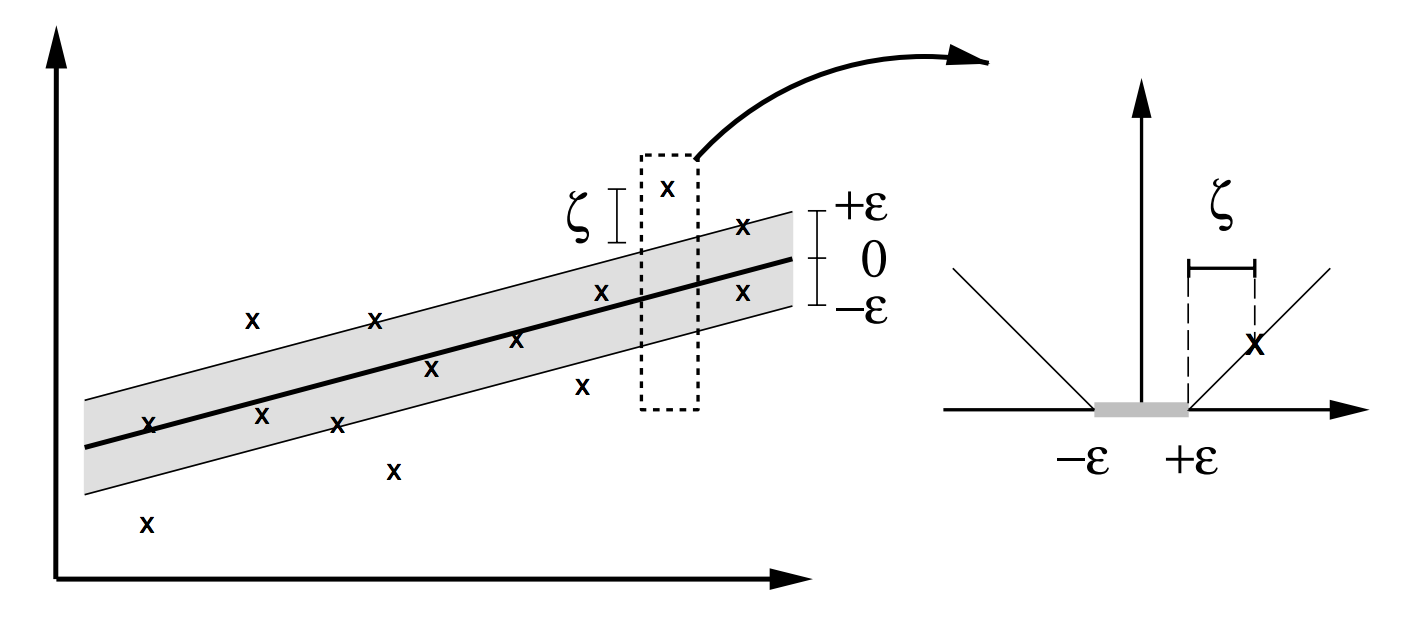
In the figure above, $\epsilon$ adjusts the window of permissible data points, while $C$ determines the slope of the penalty for points outside the $\epsilon$-window.


### (e) Evaluating $f(x)$ for new sample $x$

Say a new sample $x'$ is introduced. Then,

$$ f(x') = \langle w,x' \rangle = \sum_{i=1}^n (\alpha_i - \alpha_i^*) \langle x_i,x' \rangle $$

***

## 4. SVM Implementation

In [85]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import scale
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

### (a) "Hard" maximum-margin SVM classifier

In [69]:
# Define train, predict functions for hard-margin SVM

def train(clf,X,y):
    clf.fit(X,y)
    return clf

def predict(clf,X,y):
    yhat = clf.predict(X)
    assert accuracy_score(y,yhat) == 1.0,"ERROR: No hard-margin achieved"
    return yhat

# Create dummy data with 2 centers and low std
X, y = make_blobs(centers=2, cluster_std=0.5,
                  n_features=6, random_state=2018)

# SVM has hard-margin for large values of C 
clf = svm.SVC(kernel='rbf', C=1e10)
clf = train(clf,X,y)
yhat = predict(clf,X,y)
print "Accuracy =", accuracy_score(y,yhat)

Accuracy = 1.0


### (b) SVM with linear kernel

In [93]:
# Load Data

data = pd.read_table('creditCard.csv', sep=',')
X, y = data.drop('Class', axis=1), data['Class']

X = scale(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.9, random_state=1)

Accuracy = 0.8561


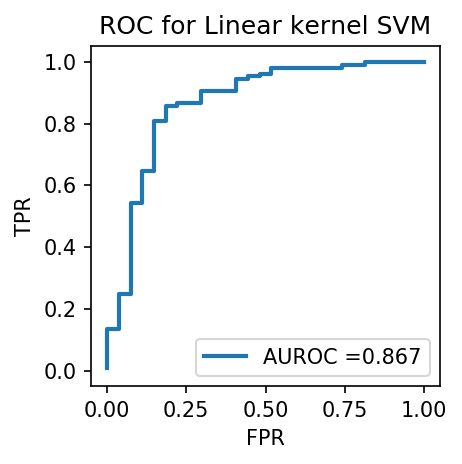

In [94]:
# Run linear kernel classifier
clf = None
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
y_test_probs = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs[:,1])
auroc = auc(fpr, tpr)
print "Accuracy =",round(accuracy_score(y_test,y_test_pred),4)

fig = plt.figure(figsize=(3,3),dpi=150)
plt.plot(fpr,tpr,lw=2,label='AUROC ='+str(round(auroc,4)))
plt.xlim([-0.05, 1.05]); plt.ylim([-0.05, 1.05])
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC for Linear kernel SVM')
plt.show()

### (c) SVM with radial basis kernel

Sigma = 5 ==> Gamma = 0.2
	Accuracy = 0.8485 

Sigma = 25 ==> Gamma = 0.04
	Accuracy = 0.8333 



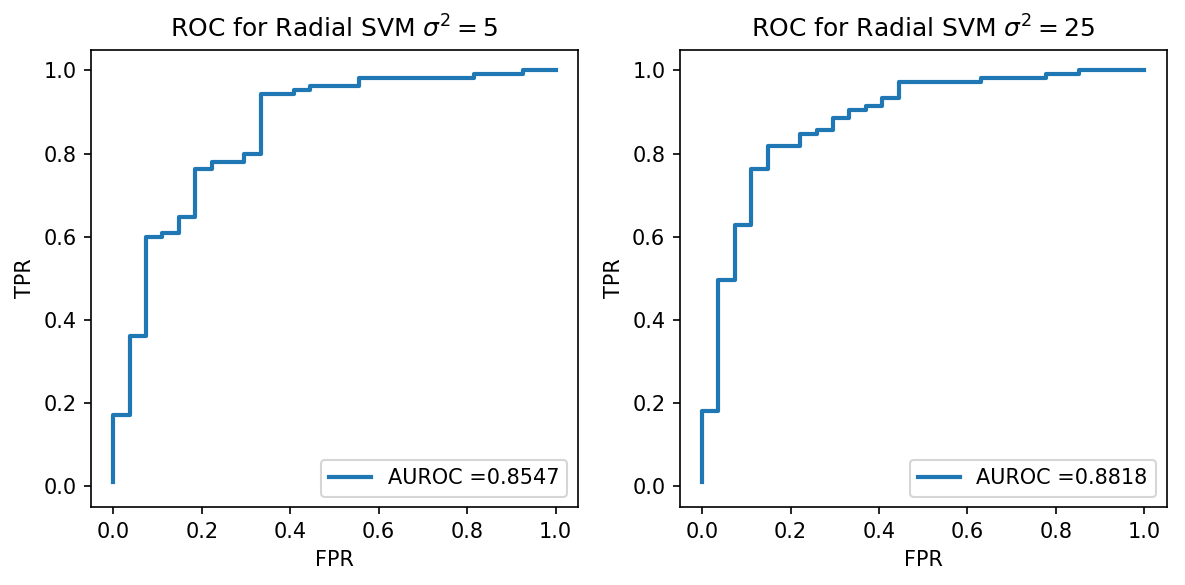

In [95]:
# Use sklearn's default 'rbf' kernel where gamma = 1/sigma^2

fig = plt.figure(figsize=(8,4),dpi=150)
for i, sigma in enumerate([5,25]):
    
    gamma = 1/float(sigma)
    print "Sigma =", sigma,"==> Gamma =",gamma
    
    clf = svm.SVC(kernel='rbf',gamma=gamma,probability=True,random_state=1)

    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    y_test_probs = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_probs[:,1])
    auroc = auc(fpr, tpr)
    print "\tAccuracy =",round(accuracy_score(y_test,y_test_pred),4),'\n'
    
    plt.subplot(1,2,i+1)
    plt.plot(fpr,tpr,lw=2,label='AUROC ='+str(round(auroc,4)))
    plt.xlim([-0.05, 1.05]); plt.ylim([-0.05, 1.05])
    plt.xlabel('FPR'); plt.ylabel('TPR')
    plt.legend(loc="lower right")
    plt.title('ROC for Radial SVM $\sigma^2={}$'.format(sigma))
        
plt.tight_layout()
plt.show()